<a href="https://colab.research.google.com/github/naterattner/data71200/blob/master/project_2/data71200_summer24_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python notebook for project 2: LINK TK

The goal for this assignment is to apply different types of supervised learning algorithms with a range of parameter settings to your data and to observe which performs better.

In [136]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

!pip install -U scikit-learn==1.4
!pip install mglearn
import mglearn

### Step 1: Load your data

In [87]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# data (as pandas dataframes)
features = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features
targets = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

# metadata
# print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.metadata)

# variable information
# print(estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.variables)

### Step 2: Prepare  data (split into testing and training done here)
Because the dataset contains categorical variables, we will perform one-hot encoding. This is done on a Dataframe containing all data to ensure categorical values are represented in the same way in both the testing and training sets. Once one-hot encoding is done, we split the data into testing and training sets.

#### Put data into a Dataframe containing both features and targets

In [88]:
data = pd.concat([features, targets], axis=1)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


#### Perform one-hot encoding on the categorical features

In [89]:
# First look at all of the columns to check their values. We will compare against this later to make sure that only true categorical values got encoded
for i in data.columns:
  print(i)
  print(data[i].value_counts())
  print('')

Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Age
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Height
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64

Weight
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64

family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

FCVC
FCVC
3.000000    652
2.000000    600
1.000000     33

In [90]:
#One-hot encoding
data_dummies = pd.get_dummies(data, dtype=int)

#Check features and make sure only categorical features got converted
print("Features after get_dummies:\n", list(data_dummies.columns))

Features after get_dummies:
 ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Gender_Female', 'Gender_Male', 'family_history_with_overweight_no', 'family_history_with_overweight_yes', 'FAVC_no', 'FAVC_yes', 'CAEC_Always', 'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'SMOKE_no', 'SMOKE_yes', 'SCC_no', 'SCC_yes', 'CALC_Always', 'CALC_Frequently', 'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking', 'NObeyesdad_Insufficient_Weight', 'NObeyesdad_Normal_Weight', 'NObeyesdad_Obesity_Type_I', 'NObeyesdad_Obesity_Type_II', 'NObeyesdad_Obesity_Type_III', 'NObeyesdad_Overweight_Level_I', 'NObeyesdad_Overweight_Level_II']


In [91]:
display(data_dummies.head())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,1,0,0,1,0,0,0,0,0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,1,0,0,1,0,0,0,0,0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,1,0,0,0,0,0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,1,0,0,0,0,0,0,0,1


#### Split into test and training
We will separate the target variable (which is now encoded in the final seven columns) from the data before training a model

In [130]:
features = data_dummies.loc[:, 'Age':'MTRANS_Walking']
target_col = 'NObeyesdad_Obesity_Type_III'

#Extract NumPy arrays
X = features.values
y = data_dummies[target_col].values
# y = data_dummies.loc[:, 'NObeyesdad_Insufficient_Weight':'NObeyesdad_Overweight_Level_II'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (2111, 31) y.shape: (2111,)


In [131]:
# From project 1 we know the data is fairly evenly distributed, but we can still use stratified sampling to avoid sampling bias

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42,test_size=0.2)

In [132]:
# Check that the strafied sampling worked -- the distribution of targets should be the same in each dataset

def getArrayValueCounts(array):
  unique, counts = np.unique(array, return_counts=True)
  total_count = counts.sum()
  shares = counts / total_count

  print("Unique values:", unique)
  print("Counts:", counts)
  print("Shares:", shares)

print('Test')
getArrayValueCounts(y_test)
print("")
print('Train')
getArrayValueCounts(y_train)

Test
Unique values: [0 1]
Counts: [358  65]
Shares: [0.8463357 0.1536643]

Train
Unique values: [0 1]
Counts: [1429  259]
Shares: [0.84656398 0.15343602]


### Step 3: Examine your target attribute

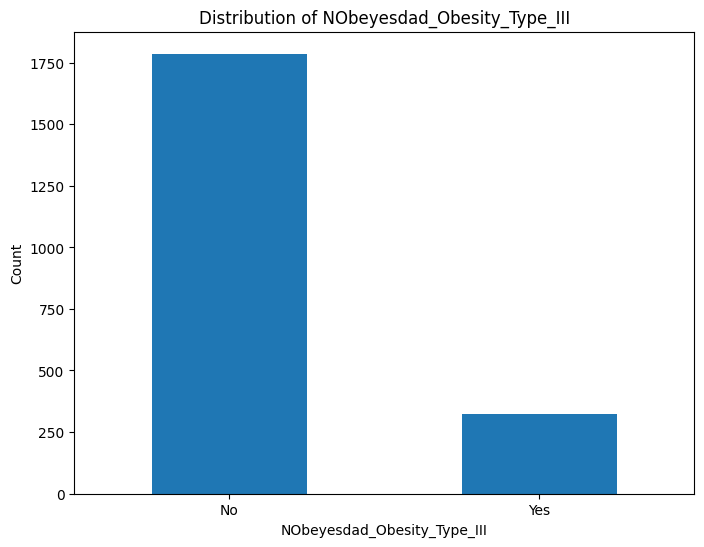

In [151]:
unique, counts = np.unique(y, return_counts=True)
distribution = pd.Series(counts, index=unique)

# Bar chart
distribution.plot(kind='bar', figsize=(8, 6))
plt.xlabel('NObeyesdad_Obesity_Type_III')
plt.ylabel('Count')
plt.title('Distribution of NObeyesdad_Obesity_Type_III')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

### Steps 4 and 5: Two supervised learning algorithms

#### 1. K-nearest neighbors
Calculate precision, recall, and F1

In [134]:
from sklearn.neighbors import KNeighborsClassifier
# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.9988151658767772


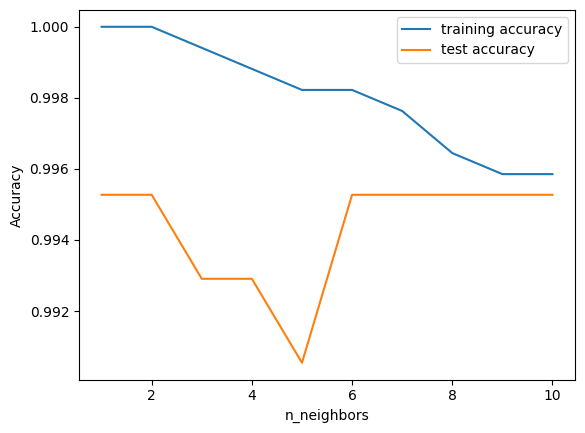

In [137]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

Run with the default parameters using cross-validation on the whole dataset

Adjust 2-3 parameters using grid search. Report evaluation metrics for the best and worst-performing parameter settings.


#### 2. Random forest